In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	33
float64		column 2	33
float64		column 3	268
float64		column 4	132
float64		column 5	235
float64		column 6	66
float64		column 7	235
float64		column 8	202
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,650.000000,650.000000,415.000000,551.000000,448.000000,617.000000,448.000000,481.000000,683.000000
mean,4.416923,3.113846,2.966265,2.724138,3.120536,3.555916,3.252232,2.696466,1.603221
std,2.811492,3.034871,2.811952,2.771960,2.179573,3.638342,2.313513,2.957224,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.750000,4.000000,3.000000,3.000000,6.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

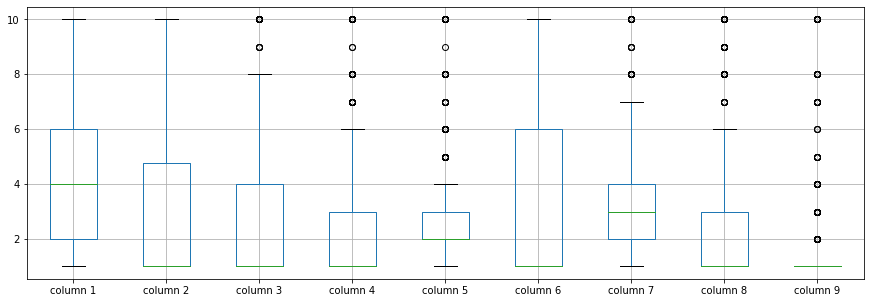

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.416923
column 2    3.113846
column 3    2.966265
column 4    2.724138
column 5    3.120536
column 6    3.555916
column 7    3.252232
column 8    2.696466
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.634279,0.634198,0.474487,0.498085,0.579051,0.545562,0.536898,0.359213
column 2,0.634279,1.000000,0.887999,0.694115,0.717663,0.679014,0.722259,0.710655,0.464878
column 3,0.634198,0.887999,1.000000,0.612375,0.683139,0.678490,0.660053,0.684299,0.372419
column 4,0.474487,0.694115,0.612375,1.000000,0.518278,0.651400,0.583506,0.539708,0.418020
column 5,0.498085,0.717663,0.683139,0.518278,1.000000,0.534463,0.586253,0.627619,0.375750
column 6,0.579051,0.679014,0.678490,0.651400,0.534463,1.000000,0.658454,0.504378,0.317807
column 7,0.545562,0.722259,0.660053,0.583506,0.586253,0.658454,1.000000,0.614875,0.261523
column 8,0.536898,0.710655,0.684299,0.539708,0.627619,0.504378,0.614875,1.000000,0.378857
column 9,0.359213,0.464878,0.372419,0.418020,0.375750,0.317807,0.261523,0.378857,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+54,9+54+54,9+54+54,9+54+54+54+54,9+54+54+54,9+54+54,9+54,9], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.687947818211146
Epoch: 1 , loss: 28.79079332805815
Epoch: 2 , loss: 28.517739523024787
Epoch: 3 , loss: 28.27395030430385
Epoch: 4 , loss: 27.291393098377046
Epoch: 5 , loss: 24.975306737990607
Epoch: 6 , loss: 24.459093888600666
Epoch: 7 , loss: 24.40779817672003
Epoch: 8 , loss: 23.96332023257301
Epoch: 9 , loss: 23.31859468278431
Epoch: 10 , loss: 23.074299653371174
Epoch: 11 , loss: 22.553667045774915
Epoch: 12 , loss: 22.155768417176745
Epoch: 13 , loss: 21.818155379522416
Epoch: 14 , loss: 21.42940864108858
Epoch: 15 , loss: 21.12047052383423
Epoch: 16 , loss: 20.7072054090954
Epoch: 17 , loss: 20.995229562123615
Epoch: 18 , loss: 20.83421854745774
Epoch: 19 , loss: 20.4642075356983
Epoch: 20 , loss: 20.3930508295695
Epoch: 21 , loss: 19.421749024164107
Epoch: 22 , loss: 19.85154828571138
Epoch: 23 , loss: 19.70883800869896
Epoch: 24 , loss: 19.262435390835716
Epoch: 25 , loss: 19.4058423269362

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.130759,0.000000,-0.890001,0.0,-0.838438,0.000393,0
679,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
680,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
681,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(108.5366802290728, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.3236729897959193

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.000000,1.000000,2.000000,1.0,3.000000,1.000000,1
1,5.0,4.0,4.000000,5.000000,7.000000,10.0,3.000000,2.000000,1
2,3.0,1.0,1.000000,1.000000,2.000000,2.0,3.000000,1.000000,1
3,6.0,8.0,8.000000,1.000000,3.000000,4.0,3.000000,7.000000,1
4,4.0,1.0,1.000000,3.000000,2.000000,1.0,3.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.130759,1.000000,1.109999,1.0,1.161562,1.000393,1
679,2.0,1.0,1.000000,1.000000,2.000000,1.0,3.000000,1.000000,1
680,5.0,10.0,10.000000,10.000000,4.000000,10.0,5.000000,6.000000,3
681,1.0,1.0,1.000000,3.000000,2.000000,1.0,1.000000,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AN_20(imp).xlsx", index=False, header=False)